In [1]:
from windrose import WindroseAxes, WindAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd
from datetime import datetime, timedelta
import glob

import cmaps

%matplotlib inline

C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in

In [2]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [3]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
BUZM3_wind = BUZM3_wind[BUZM3_wind.WSPD !=99]
BUZM3_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,200,8.1,8.3
1,2005-01-01 01:00:00,195,11.5,11.8
2,2005-01-01 02:00:00,193,12.1,12.7
3,2005-01-01 03:00:00,205,12.3,12.9
4,2005-01-01 04:00:00,219,12.7,13.4
...,...,...,...,...
690,2020-02-29 19:00:00,252,10.0,13.0
691,2020-02-29 20:00:00,252,11.2,12.6
692,2020-02-29 21:00:00,268,8.0,9.6
693,2020-02-29 22:00:00,308,8.6,9.3


In [4]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
BUZM3_wind = BUZM3_wind[(BUZM3_wind.WSPD !=99) & (BUZM3_wind.WDIR !=99)]
BUZM3_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,200,8.1,8.3
1,2005-01-01 01:00:00,195,11.5,11.8
2,2005-01-01 02:00:00,193,12.1,12.7
3,2005-01-01 03:00:00,205,12.3,12.9
4,2005-01-01 04:00:00,219,12.7,13.4
...,...,...,...,...
690,2020-02-29 19:00:00,252,10.0,13.0
691,2020-02-29 20:00:00,252,11.2,12.6
692,2020-02-29 21:00:00,268,8.0,9.6
693,2020-02-29 22:00:00,308,8.6,9.3


In [5]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr):
    yr, mo, doy, hr = [int(x) for x in [yr, mo, doy, hr]]
    dt = datetime(yr - 0, mo, doy, hr)
    return dt

In [6]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3/1999-2004'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind_1 = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                        usecols=[0,1,2,3,4,5,6], header=0, date_parser=parse, 
                          parse_dates={'Date':['YYYY','MM','DD','hh']}) for f in all_files))
BUZM3_wind_1 = BUZM3_wind_1[(BUZM3_wind_1.WSPD !=99) & (BUZM3_wind_1.WD !=99)]
BUZM3_wind_1 = BUZM3_wind_1.rename({"WD": "WDIR"}, axis='columns')
BUZM3_wind_1

,Date,WDIR,WSPD,GST
0,1999-01-01 00:00:00,275,5.0,6.3
1,1999-01-01 01:00:00,292,5.0,5.6
2,1999-01-01 02:00:00,309,5.8,6.4
3,1999-01-01 03:00:00,298,5.1,6.4
4,1999-01-01 04:00:00,292,4.6,5.9
...,...,...,...,...
8764,2004-12-31 19:00:00,179,7.2,7.6
8765,2004-12-31 20:00:00,176,9.4,10.0
8766,2004-12-31 21:00:00,174,10.2,10.8
8767,2004-12-31 22:00:00,181,9.3,9.9


In [7]:
merge = [BUZM3_wind_1, BUZM3_wind]
BUZM3_wind = pd.concat(merge)
BUZM3_wind

,Date,WDIR,WSPD,GST
0,1999-01-01 00:00:00,275,5.0,6.3
1,1999-01-01 01:00:00,292,5.0,5.6
2,1999-01-01 02:00:00,309,5.8,6.4
3,1999-01-01 03:00:00,298,5.1,6.4
4,1999-01-01 04:00:00,292,4.6,5.9
...,...,...,...,...
690,2020-02-29 19:00:00,252,10.0,13.0
691,2020-02-29 20:00:00,252,11.2,12.6
692,2020-02-29 21:00:00,268,8.0,9.6
693,2020-02-29 22:00:00,308,8.6,9.3


In [8]:
BUZM3_wind = BUZM3_wind.set_index('Date')
BUZM3_wind['u10'] = BUZM3_wind['WSPD']*np.sqrt((0.4**2)/0.0012)*(1/(np.log(24.8/0.000097)))

In [9]:
BUZM3_wind

,WDIR,WSPD,GST,u10
Date,,,,
1999-01-01 00:00:00,275,5.0,6.3,4.636740
1999-01-01 01:00:00,292,5.0,5.6,4.636740
1999-01-01 02:00:00,309,5.8,6.4,5.378618
1999-01-01 03:00:00,298,5.1,6.4,4.729474
1999-01-01 04:00:00,292,4.6,5.9,4.265800
...,...,...,...,...
2020-02-29 19:00:00,252,10.0,13.0,9.273479
2020-02-29 20:00:00,252,11.2,12.6,10.386297
2020-02-29 21:00:00,268,8.0,9.6,7.418783


In [10]:
BUZM3_wind.to_csv('BUZM3_99-20.txt', sep='\t', index=False)

In [11]:
wd = BUZM3_wind['WDIR']
ws = BUZM3_wind['u10']

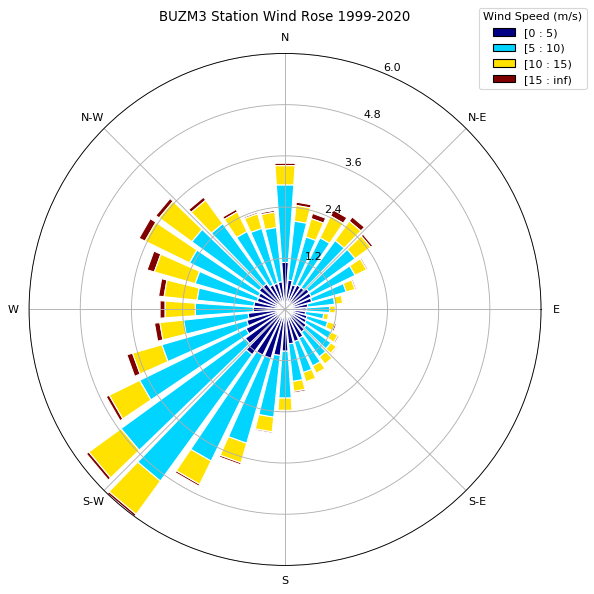

In [12]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd, ws, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose 1999-2020',size=12)
plt.savefig('BUZM3_windrose', dpi=300, bbox_inches='tight')

In [13]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [14]:
#read all files since 2016 for the 44097 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44097'
all_files = glob.glob(path + "/*.txt")

b44097_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44097_wave = b44097_wave[(b44097_wave.WVHT !=99) & (b44097_wave.MWD !=99)]
b44097_wave.reset_index(inplace=True)
b44097_wave.drop('index', 1, inplace=True)
b44097_wave

,Date,WVHT,DPD,MWD
0,2009-10-21 23:31:00,0.59,8.33,139
1,2009-10-22 00:01:00,0.65,8.33,139
2,2009-10-22 00:31:00,0.57,8.33,141
3,2009-10-22 01:01:00,0.55,5.88,173
4,2009-10-22 01:31:00,0.57,7.69,139
...,...,...,...,...
153321,2020-02-29 21:30:00,1.45,7.69,197
153322,2020-02-29 22:00:00,1.53,4.76,253
153323,2020-02-29 22:30:00,1.51,6.25,215
153324,2020-02-29 23:00:00,1.65,5.56,228


In [15]:
wvd = b44097_wave['MWD']
wh = b44097_wave['WVHT']

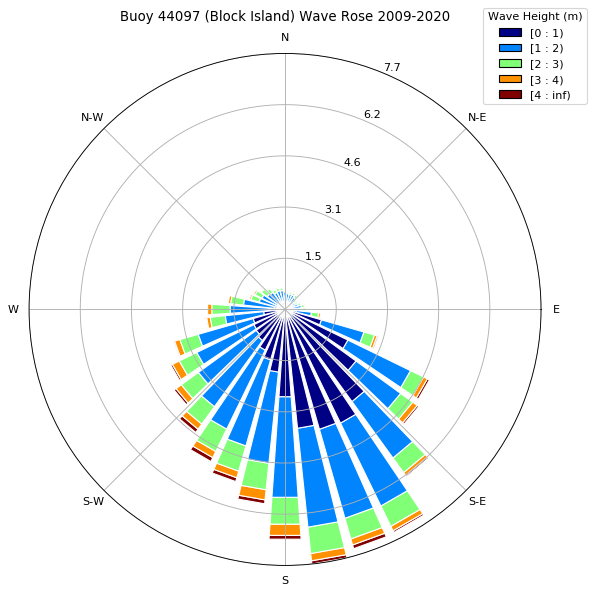

In [16]:
from windrose import WindAxes, WindroseAxes
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd, wh, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose 2009-2020',size=12)
plt.savefig('BlockIsland_waverose', dpi=300, bbox_inches='tight')